In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Output Feature = Index_Price
dataset = pd.read_csv('./datasets/economic-index.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1200 non-null   int64  
 1   Month              1200 non-null   int64  
 2   Interest_Rate      1200 non-null   float64
 3   Unemployment_Rate  1200 non-null   float64
 4   Index_Price        1200 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 47.0 KB


,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [108]:
# remove duplicates
dataset.drop_duplicates()
# remove records with missing values
dataset = dataset[dataset.notna().all(axis = 1)]

dataset.describe()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1973.500000,6.500000,3.040050,5.049392,407.213139
std,28.878105,3.453492,0.983762,1.445544,339.826463
min,1924.000000,1.000000,0.500000,2.000000,-580.090673
25%,1948.750000,3.750000,2.377500,4.037500,176.135386
50%,1973.500000,6.500000,3.050000,5.020000,408.201032
75%,1998.250000,9.250000,3.672500,6.010000,633.871918
max,2023.000000,12.000000,6.850000,9.790000,1634.035645


In [109]:
# Outlier analysis in Index_Price Column

quantile25 = dataset['Index_Price'].quantile(0.25)
quantile75 = dataset['Index_Price'].quantile(0.75)
iqr = quantile75 - quantile25

lower_bound = quantile25 - 1.5*iqr
upper_bound = quantile75 + 1.5*iqr

filter = (dataset['Index_Price'] < lower_bound) | (dataset['Index_Price'] > upper_bound)
print('Outliers Found :', filter.sum(axis = 0))
print()

dataset = dataset[~filter]          # Removing Outliers
dataset.info()

Outliers Found : 7

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1193 non-null   int64  
 1   Month              1193 non-null   int64  
 2   Interest_Rate      1193 non-null   float64
 3   Unemployment_Rate  1193 non-null   float64
 4   Index_Price        1193 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 55.9 KB


In [110]:
# Checking for correlation of input features with output features
dataset.corr(method = 'spearman')

# We usually start adding the features having the highest correlation with output feature

# Verdict :- Intrest Rate > Unemployment_Rate > Month > Year 
#               <----- Feature Importance Increases -----

# Correlation of Intrest Rate and Unemployment Rate with Index Price is significant.
# Must take Intrest Rate and Unemployment Rate

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
Year,1.000000,-0.002190,-0.008040,-0.020068,0.004127
Month,-0.002190,1.000000,0.058047,-0.026871,0.072832
Interest_Rate,-0.008040,0.058047,1.000000,0.030834,0.879556
Unemployment_Rate,-0.020068,-0.026871,0.030834,1.000000,-0.413699
Index_Price,0.004127,0.072832,0.879556,-0.413699,1.000000


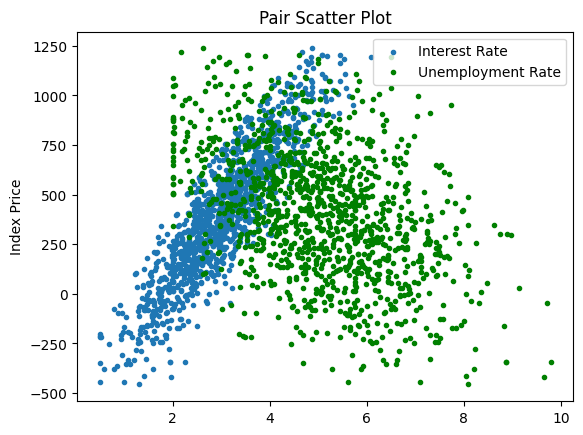

In [111]:
# Visualising Datapoints
plt.title('Pair Scatter Plot')
plt.ylabel('Index Price')
plt.scatter(dataset['Interest_Rate'], dataset['Index_Price'], marker = '.', label='Interest Rate')
plt.scatter(dataset['Unemployment_Rate'], dataset['Index_Price'], marker = '.', color = 'green', label = 'Unemployment Rate')
plt.legend()

In [112]:
# Creating Alias for Dependent and Independent Features
X = dataset[['Interest_Rate', 'Unemployment_Rate']]
Y = dataset['Index_Price']

print(type(X), X.shape)
print(type(Y), Y.shape)

<class 'pandas.core.frame.DataFrame'> (1193, 2)
<class 'pandas.core.series.Series'> (1193,)


In [113]:
# Split the Dataset
from sklearn.model_selection import train_test_split

(X_Train, X_Test, Y_Train, Y_Test) = train_test_split(X, Y, test_size = 0.25, random_state = 25)

print('Train Data:', X_Train.shape)
print('Test Data:', X_Test.shape)

Train Data: (894, 2)
Test Data: (299, 2)


In [114]:
# Normalize the Input Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Train)             # learn training data parameters

X_Train_Normalized = scaler.transform(X_Train)  # transform train input
X_Test_Normalized = scaler.transform(X_Test)    # transform test input

print(pd.DataFrame(X_Train_Normalized).head(5))
print()
print(pd.DataFrame(X_Test_Normalized).head(5))

          0         1
0 -0.754743  0.541565
1 -2.632892 -1.146217
2  1.391713 -0.092214
3 -1.384233 -1.855775
4 -0.538034 -0.560660

          0         1
0  0.421680 -0.347104
1  0.617750  1.919347
2  0.628070 -0.402215
3 -0.166532  1.326901
4 -0.372922  0.638010


In [115]:
# Model Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_Train_Normalized, Y_Train)

intercept = model.intercept_
coefficients = model.coef_

print(f'Model Trained : Index_Price = ({intercept}) + ({coefficients[0]}).Interest_Rate + ({coefficients[1]}).Unemployment_Rate')

Model Trained : Index_Price = (413.4560787506442) + (300.4455888393778).Interest_Rate + (-155.02614018278607).Unemployment_Rate


In [116]:
# Making Prediction on Test Data
Y_Test_Predicted = model.predict(X_Test_Normalized)

In [117]:
# Computing Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

mse = mean_squared_error(Y_Test, Y_Test_Predicted)
mae = mean_absolute_error(Y_Test, Y_Test_Predicted)
rmse = root_mean_squared_error(Y_Test, Y_Test_Predicted)
r2score = r2_score(Y_Test, Y_Test_Predicted)

obs = Y_Test.shape[0]
adjusted_r2 = 1 - (1 - r2score)*(obs - 2)/(obs - 2 - 1)

print(f"Mean Square Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Square Error : {rmse}")
print(f"R² Score : {r2score}")
print(f"Adjusted R² Score : {adjusted_r2}")

Mean Square Error : 0.3635306942524723
Mean Absolute Error : 0.19904408878436888
Root Mean Square Error : 0.6029350663649216
R² Score : 0.9999964388785002
Adjusted R² Score : 0.9999964268476843


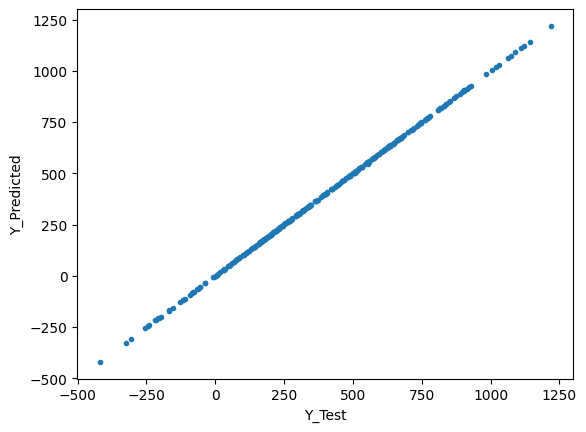

In [118]:
# Performance Analysis by Visualization

# 1. Scatter plot for Y_Predicted and Y_Test should follow a linear relation
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.scatter(Y_Test, Y_Test_Predicted, marker = '.')

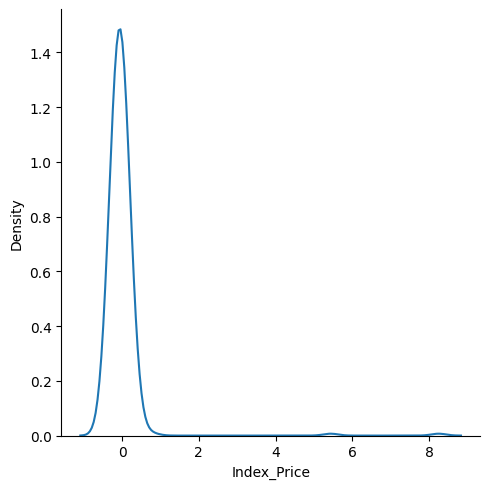

In [119]:
# 2. Kernel Density plot of Residuals (Errors) should follow a normal distribution

residuals = Y_Test - Y_Test_Predicted
sns.displot(residuals, kind = 'kde')

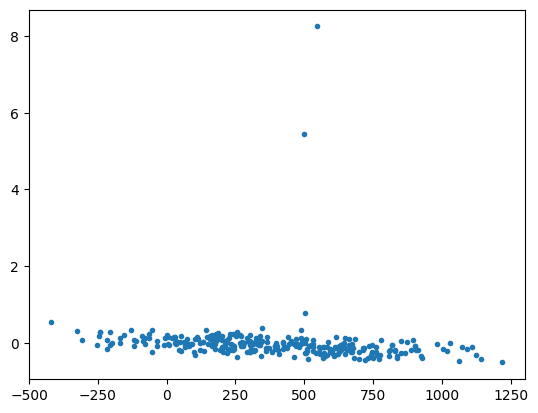

In [120]:
# 3. Scatter plot for Predictions w.r.t Residuals should be completely random

plt.scatter(Y_Test_Predicted, residuals, marker = '.')

In [121]:
# Model using OLS
from statsmodels.api import OLS

OLSModel = OLS(Y_Train, X_Train_Normalized)
OLSModel = OLSModel.fit()

print(OLSModel.summary())

                                 OLS Regression Results                                
Dep. Variable:            Index_Price   R-squared (uncentered):                   0.397
Model:                            OLS   Adj. R-squared (uncentered):              0.396
Method:                 Least Squares   F-statistic:                              294.0
Date:                Wed, 03 Dec 2025   Prob (F-statistic):                    8.50e-99
Time:                        03:25:45   Log-Likelihood:                         -6654.5
No. Observations:                 894   AIC:                                  1.331e+04
Df Residuals:                     892   BIC:                                  1.332e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------